In [1]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_history(history, title=None, validation=True):
  fig = plt.figure(figsize=(40,10))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='loss')
  if validation:
    plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('Loss by epoch')
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='accuracy')
  if validation:
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('Accuracy by epoch')
  plt.legend();

  if title != None:
    fig.suptitle(title, fontsize=16)
  plt.show()

In [3]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
def generate_label(X, i1, i2, i3):
  Y = np.zeros(X.shape[0])
  filter1 = (X[:,i1] < 0) & (X[:,i2] < 0) & (X[:,i3] < 0)
  filter2 = (X[:,i1] < 0) & (X[:,i2] > 0) & (X[:,i3] > 0)
  filter3 = (X[:,i1] > 0) & (X[:,i2] < 0) & (X[:,i3] > 0)
  filter4 = (X[:,i1] > 0) & (X[:,i2] > 0) & (X[:,i3] < 0)
  Y[filter1] = 1
  Y[filter2] = 1
  Y[filter3] = 1
  Y[filter4] = 1
  return Y

In [5]:
Y_short_memory = generate_label(X, -1, -2, -3)
Y_long_memory = generate_label(X, 0, 1, 2)

In [6]:
def perform_modeling(i_layer, x_layer, X, Y_short, Y_long, epochs, learning_rate):
  print('Short memory model')
  model1 = Model(i_layer,x_layer)
  model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
  history_short = model1.fit(X, Y_short, epochs=epochs, validation_split=0.5)

  print('Long memory model')
  model2 = Model(i_layer,x_layer)
  model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
  history_long = model2.fit(X, Y_long, epochs=epochs, validation_split=0.5)

  print(model2.summary())

  plot_history(history_short, title="Short term memory")
  plot_history(history_long, title="Long term memory")

Short memory model
Epoch 1/100
79/79 [==============================] - 2s 9ms/step - loss: 0.7556 - accuracy: 0.5176 - val_loss: 0.7025 - val_accuracy: 0.5108
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5028 - val_loss: 0.6924 - val_accuracy: 0.5120
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.5120 - val_loss: 0.6930 - val_accuracy: 0.5196
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4996 - val_loss: 0.6921 - val_accuracy: 0.5132
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4868 - val_loss: 0.6922 - val_accuracy: 0.5040
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5004 - val_loss: 0.6923 - val_accuracy: 0.5028
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5004 - val_loss: 0.6922 - val_accuracy: 0

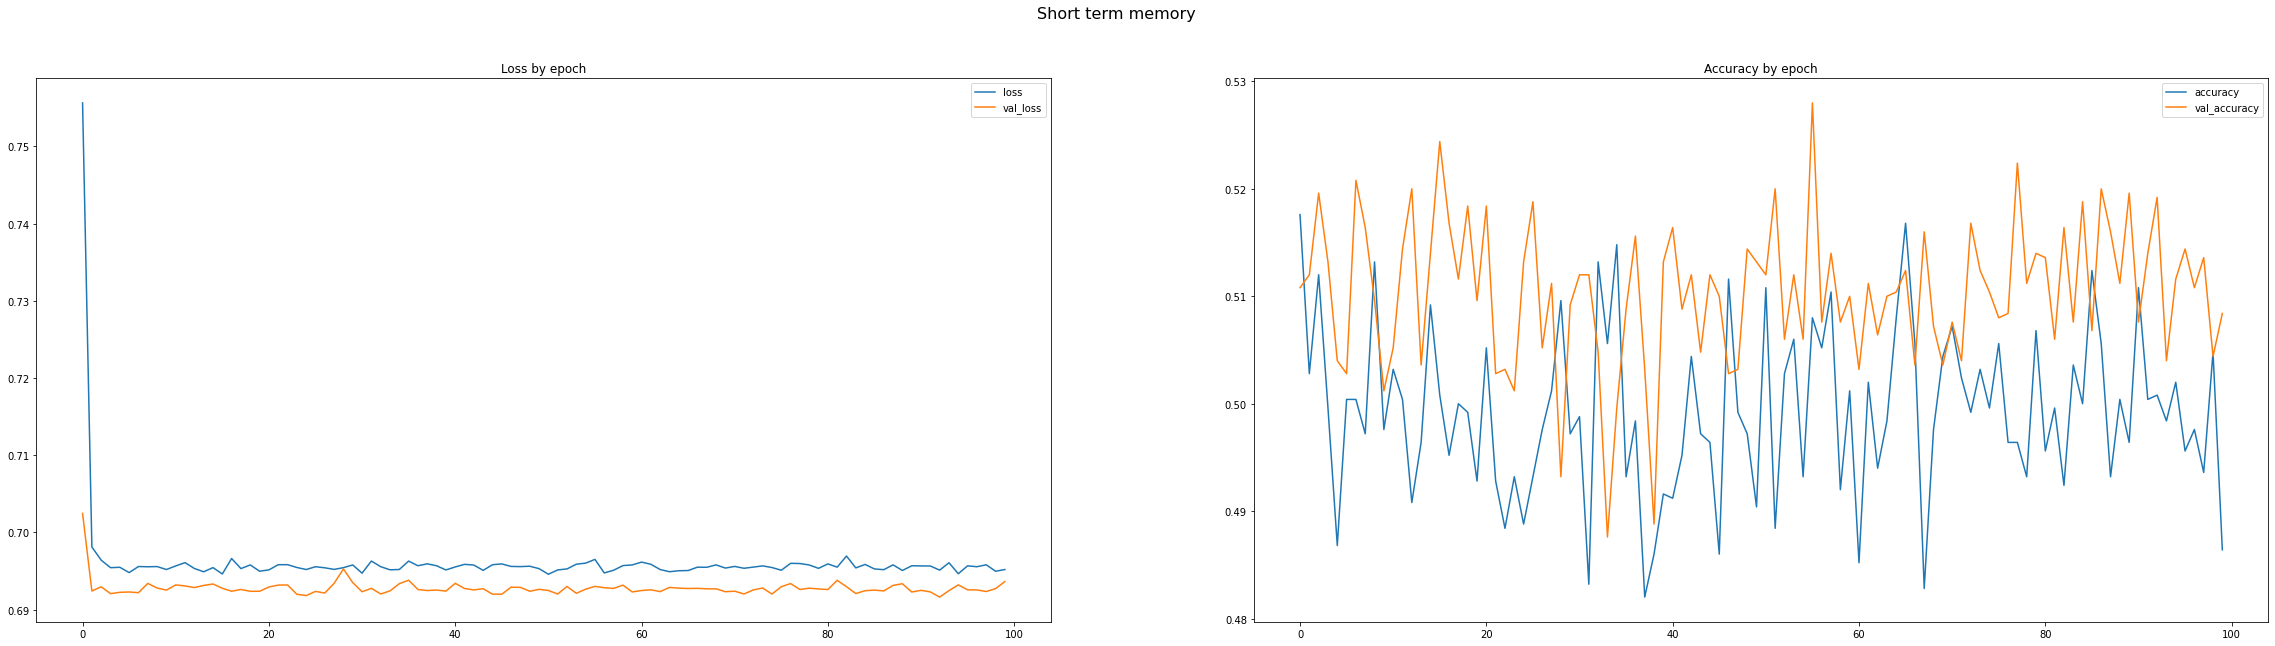

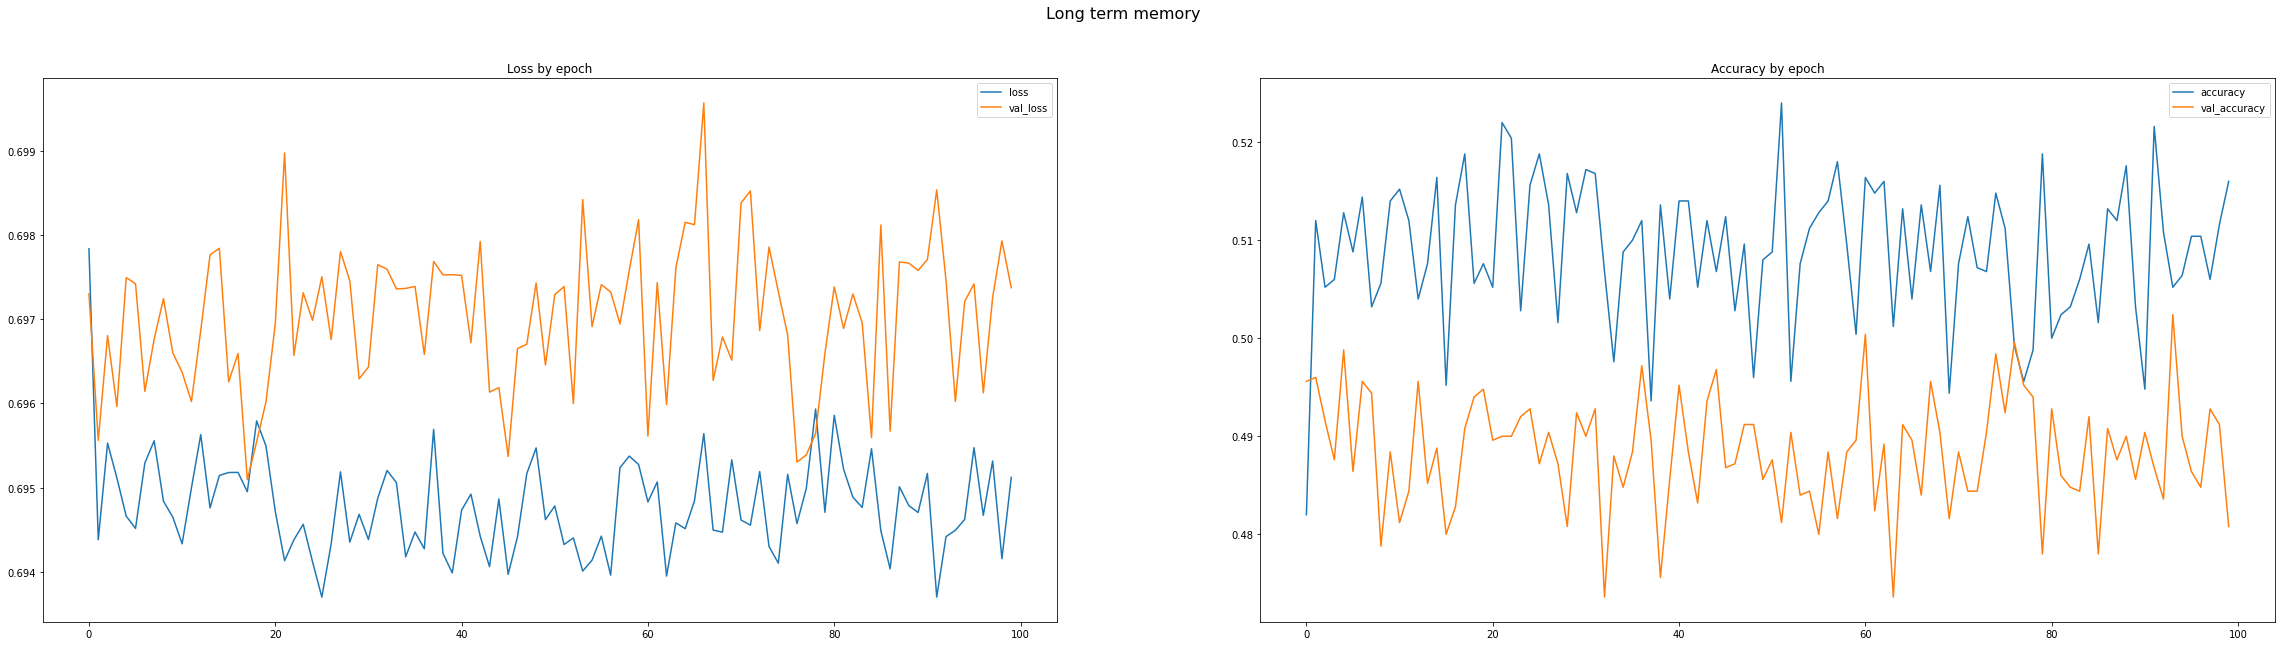

In [7]:
i = Input((T,))
x = Dense(1, activation='sigmoid')(i)

perform_modeling(i, x, X, Y_short_memory, Y_long_memory, 100, 0.01)

Short memory model
Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.7003 - accuracy: 0.5460 - val_loss: 0.6673 - val_accuracy: 0.6024
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6430 - accuracy: 0.6596 - val_loss: 0.6111 - val_accuracy: 0.7192
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5768 - accuracy: 0.7432 - val_loss: 0.5331 - val_accuracy: 0.7804
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4978 - accuracy: 0.7976 - val_loss: 0.4613 - val_accuracy: 0.8192
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4221 - accuracy: 0.8496 - val_loss: 0.4017 - val_accuracy: 0.8548
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.3646 - accuracy: 0.8688 - val_loss: 0.3493 - val_accuracy: 0.8660
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3078 - accuracy: 0.8988 - val_loss: 0.2852 - val_accuracy: 0

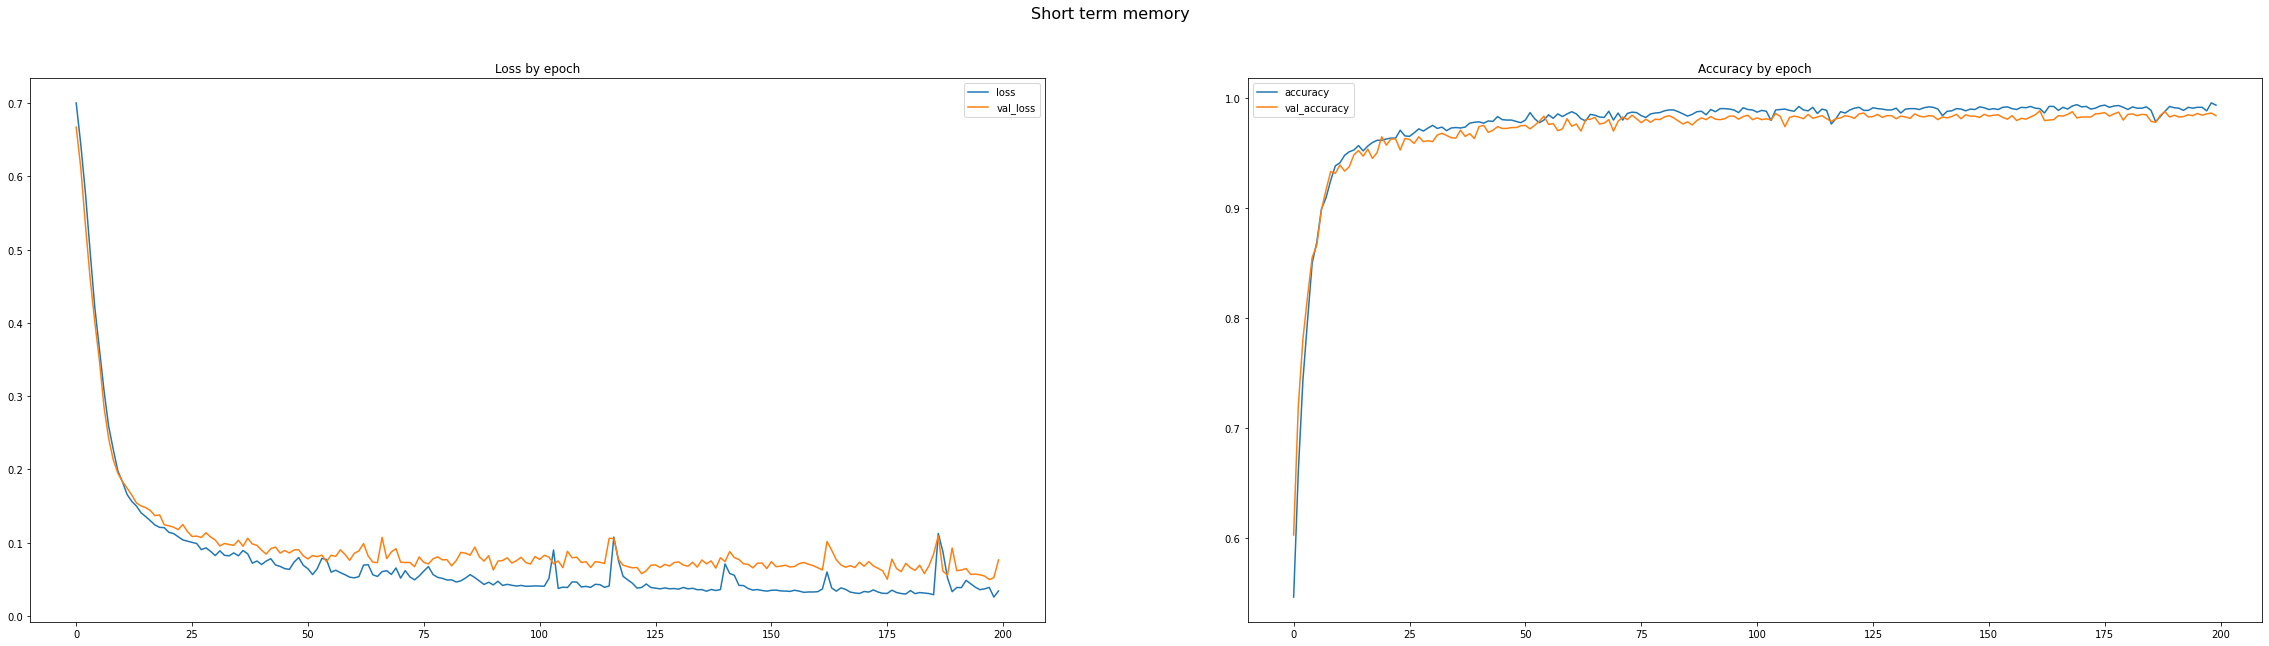

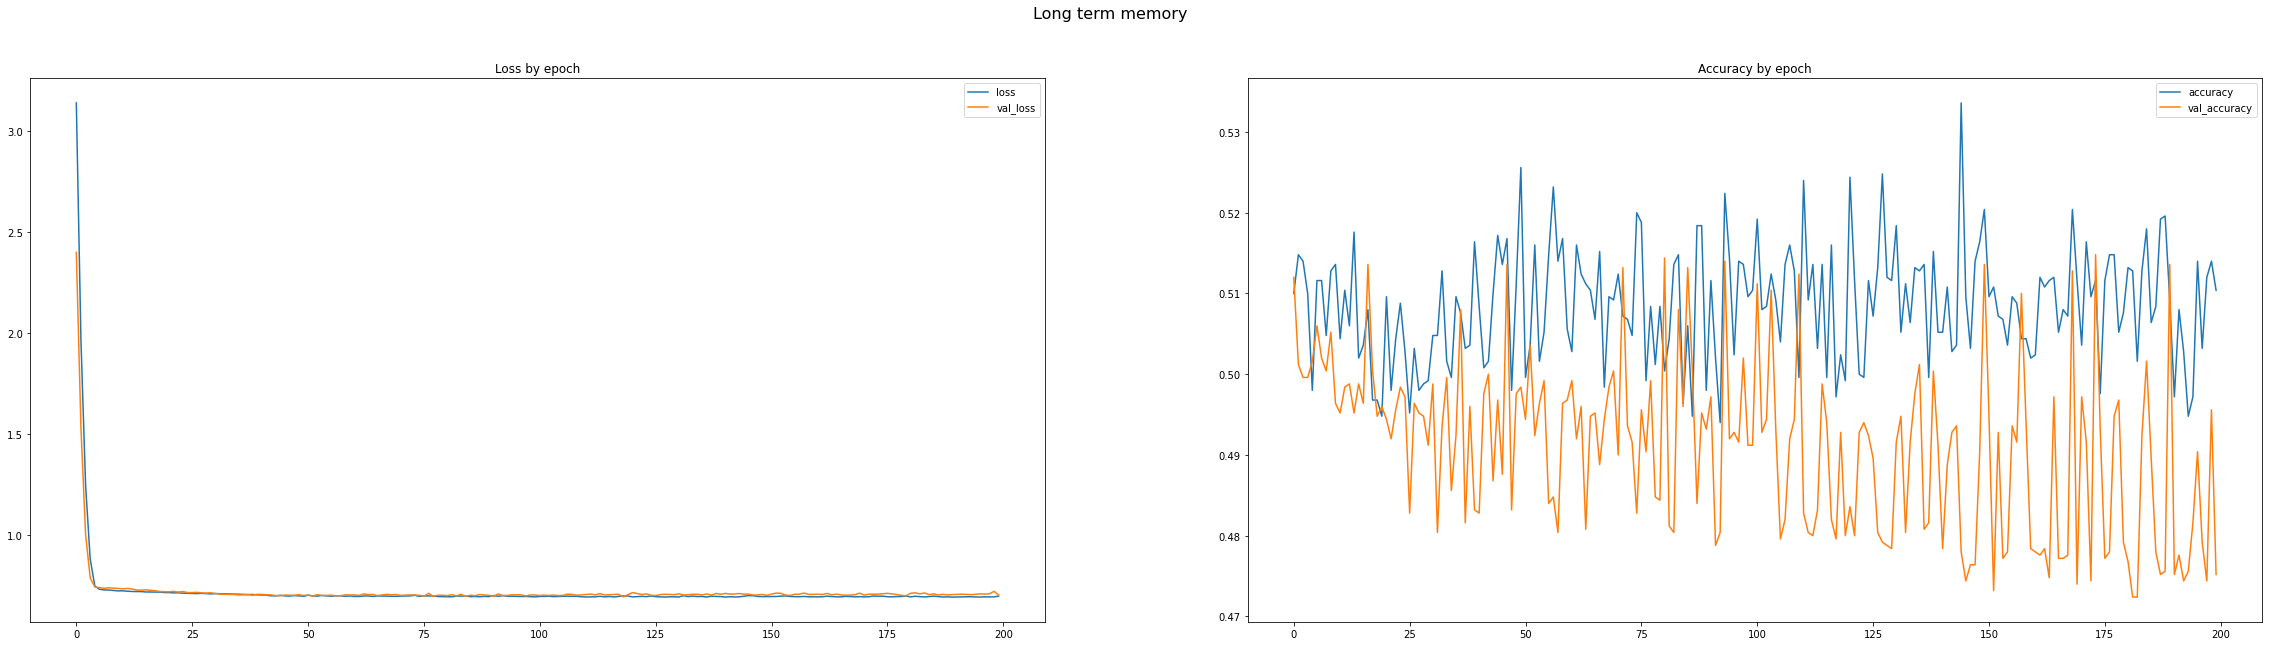

In [8]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 15ms/step - loss: 0.6943 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.4948
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6922 - accuracy: 0.5208 - val_loss: 0.6909 - val_accuracy: 0.5156
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6629 - accuracy: 0.5696 - val_loss: 0.6220 - val_accuracy: 0.6404
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.5453 - accuracy: 0.6828 - val_loss: 0.4742 - val_accuracy: 0.7792
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.3467 - accuracy: 0.8796 - val_loss: 0.2496 - val_accuracy: 0.9296
Epoch 6/200
79/79 [==============================] - 1s 12ms/step - loss: 0.1891 - accuracy: 0.9512 - val_loss: 0.1612 - val_accuracy: 0.9560
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.1317 - accuracy: 0.9640 - val_loss: 0.1331 - val_accurac

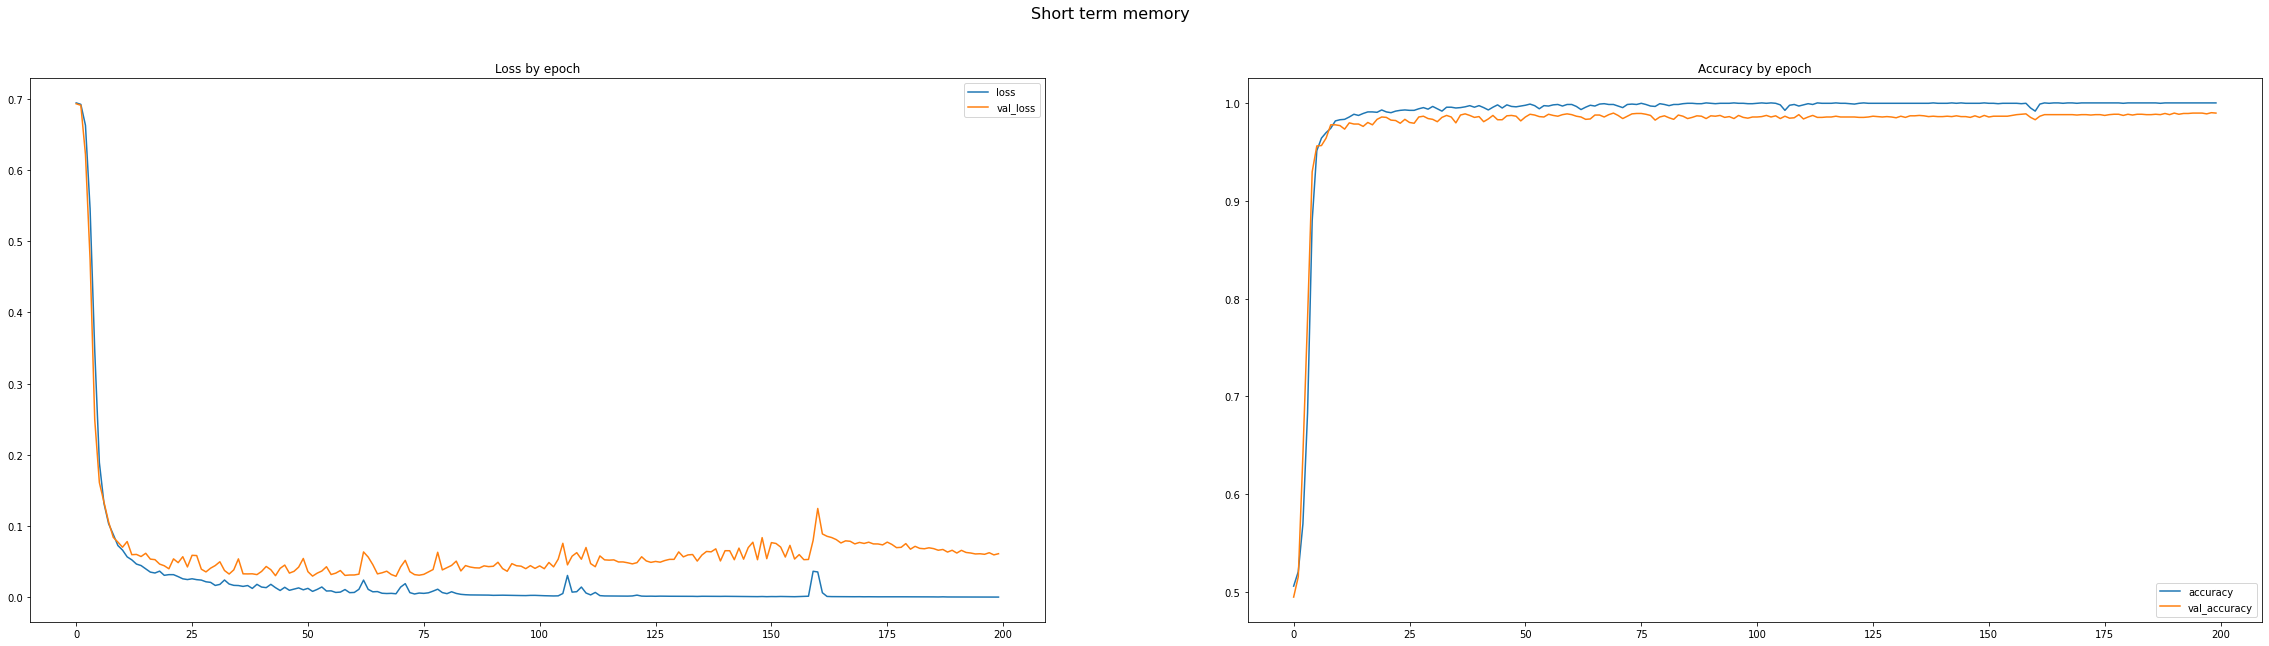

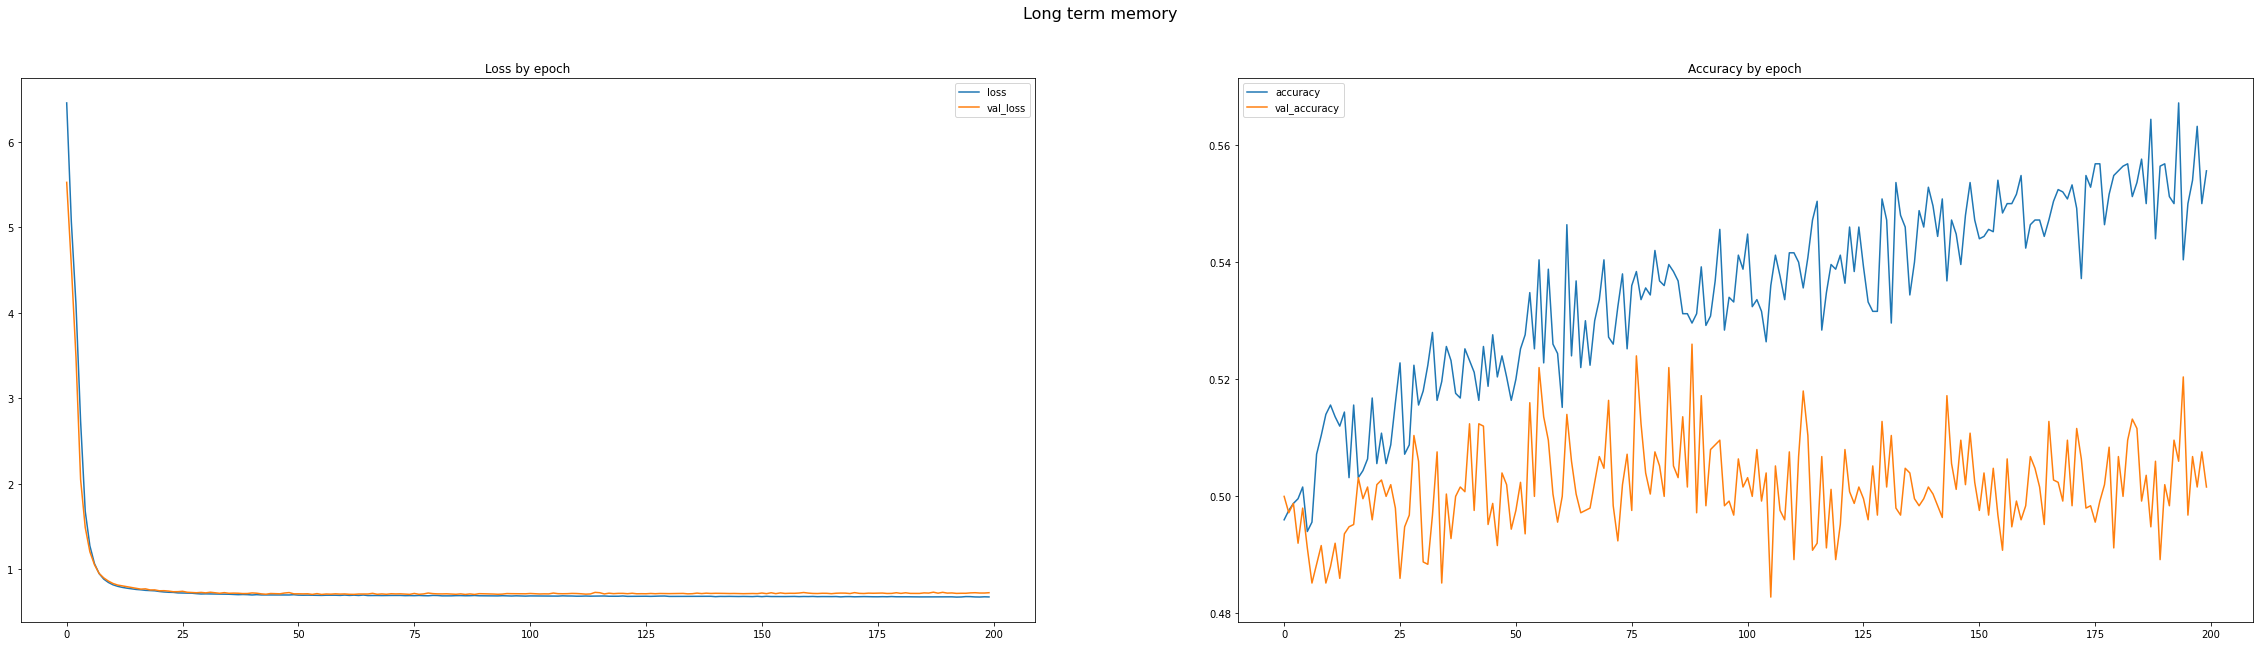

In [9]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 15ms/step - loss: 0.6939 - accuracy: 0.5080 - val_loss: 0.6937 - val_accuracy: 0.5108
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.5104 - val_loss: 0.6955 - val_accuracy: 0.4908
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4960 - val_loss: 0.6924 - val_accuracy: 0.5472
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6894 - accuracy: 0.5492 - val_loss: 0.6851 - val_accuracy: 0.5284
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6409 - accuracy: 0.6360 - val_loss: 0.6181 - val_accuracy: 0.6624
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.5775 - accuracy: 0.6940 - val_loss: 0.5719 - val_accuracy: 0.6912
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.5307 - accuracy: 0.7284 - val_loss: 0.5155 - val_accuracy:

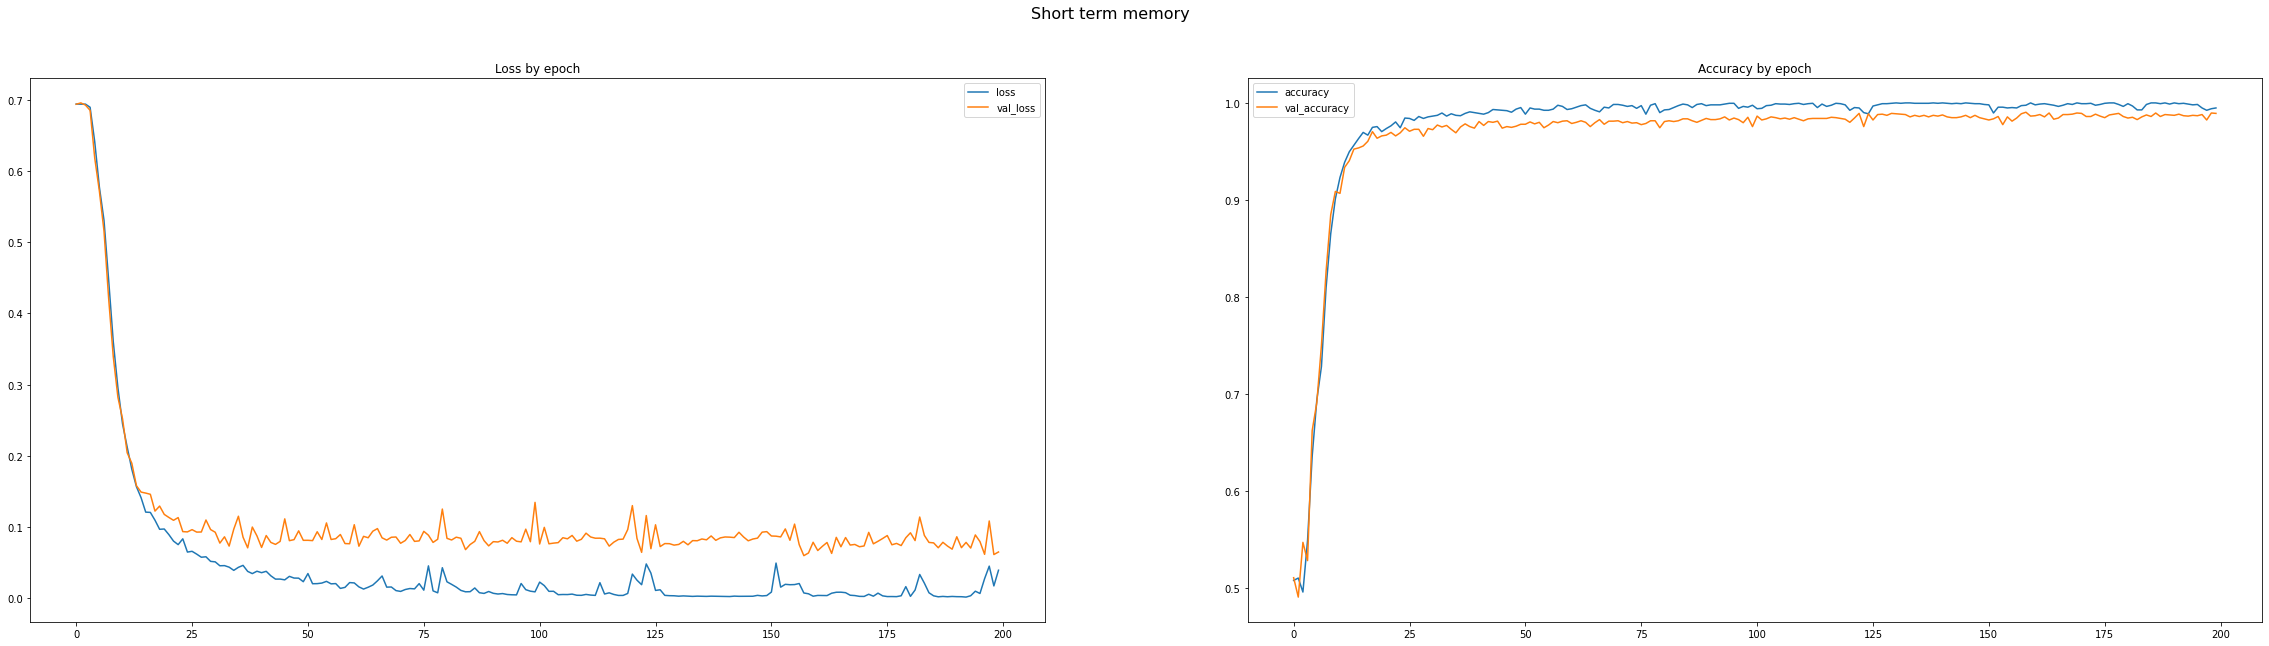

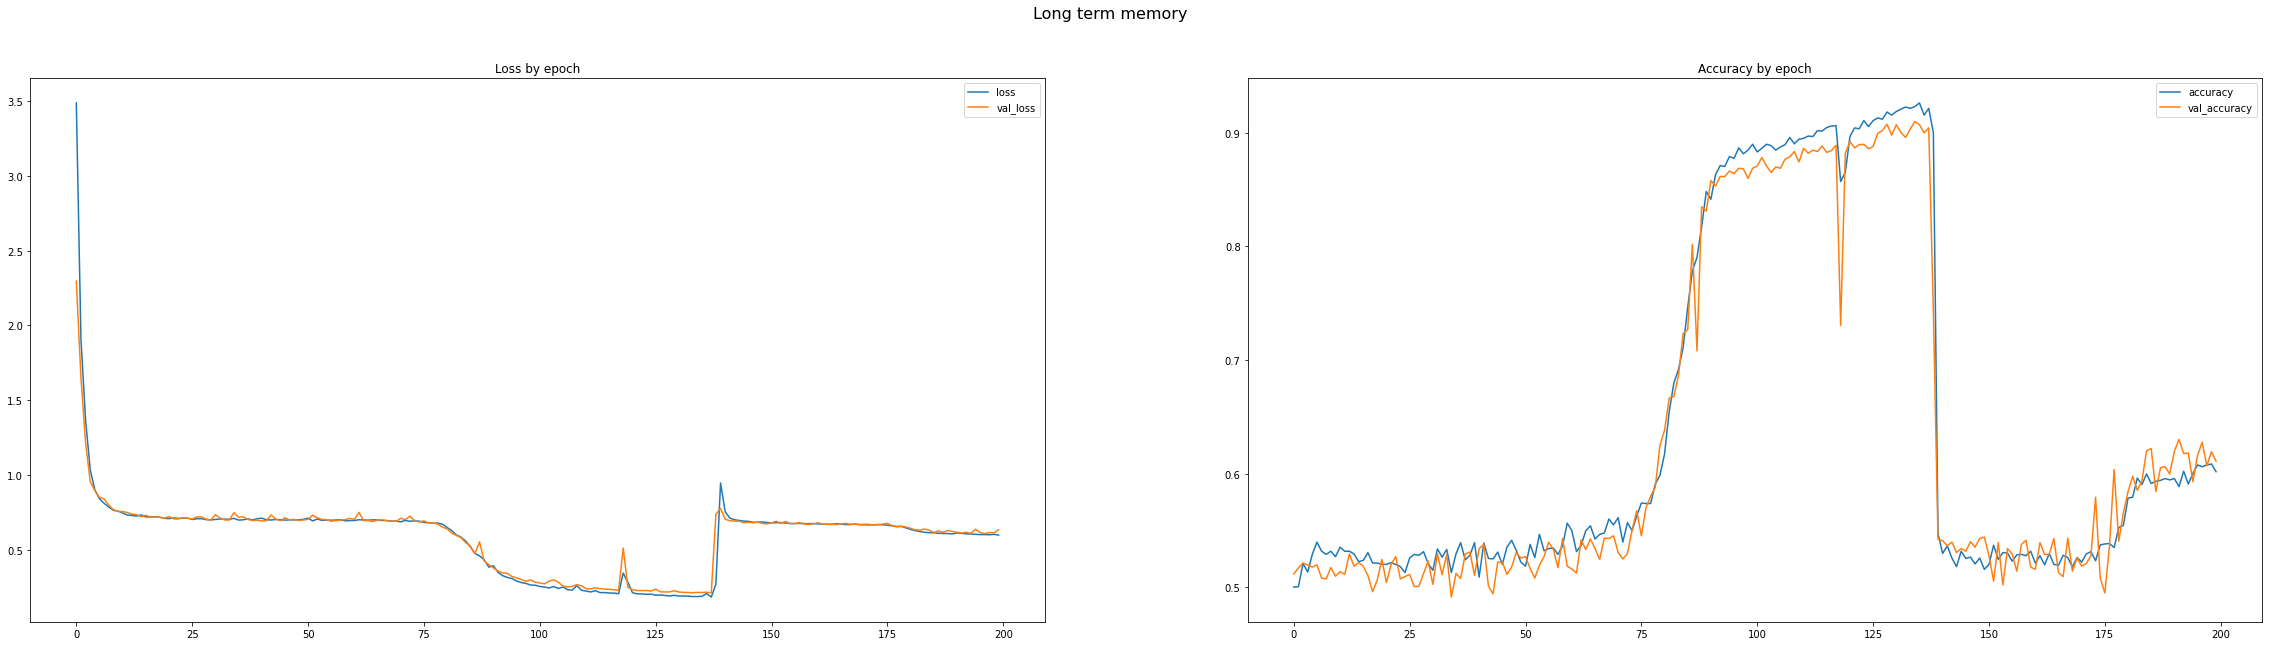

In [10]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = GRU(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 15ms/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.4872
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6943 - accuracy: 0.4896 - val_loss: 0.6930 - val_accuracy: 0.4948
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.4984 - val_loss: 0.6927 - val_accuracy: 0.5148
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5172 - val_loss: 0.6925 - val_accuracy: 0.5092
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6920 - accuracy: 0.5120 - val_loss: 0.6912 - val_accuracy: 0.5316
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6916 - accuracy: 0.5252 - val_loss: 0.6906 - val_accuracy: 0.5308
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6903 - accuracy: 0.5332 - val_loss: 0.6899 - val_accuracy: 

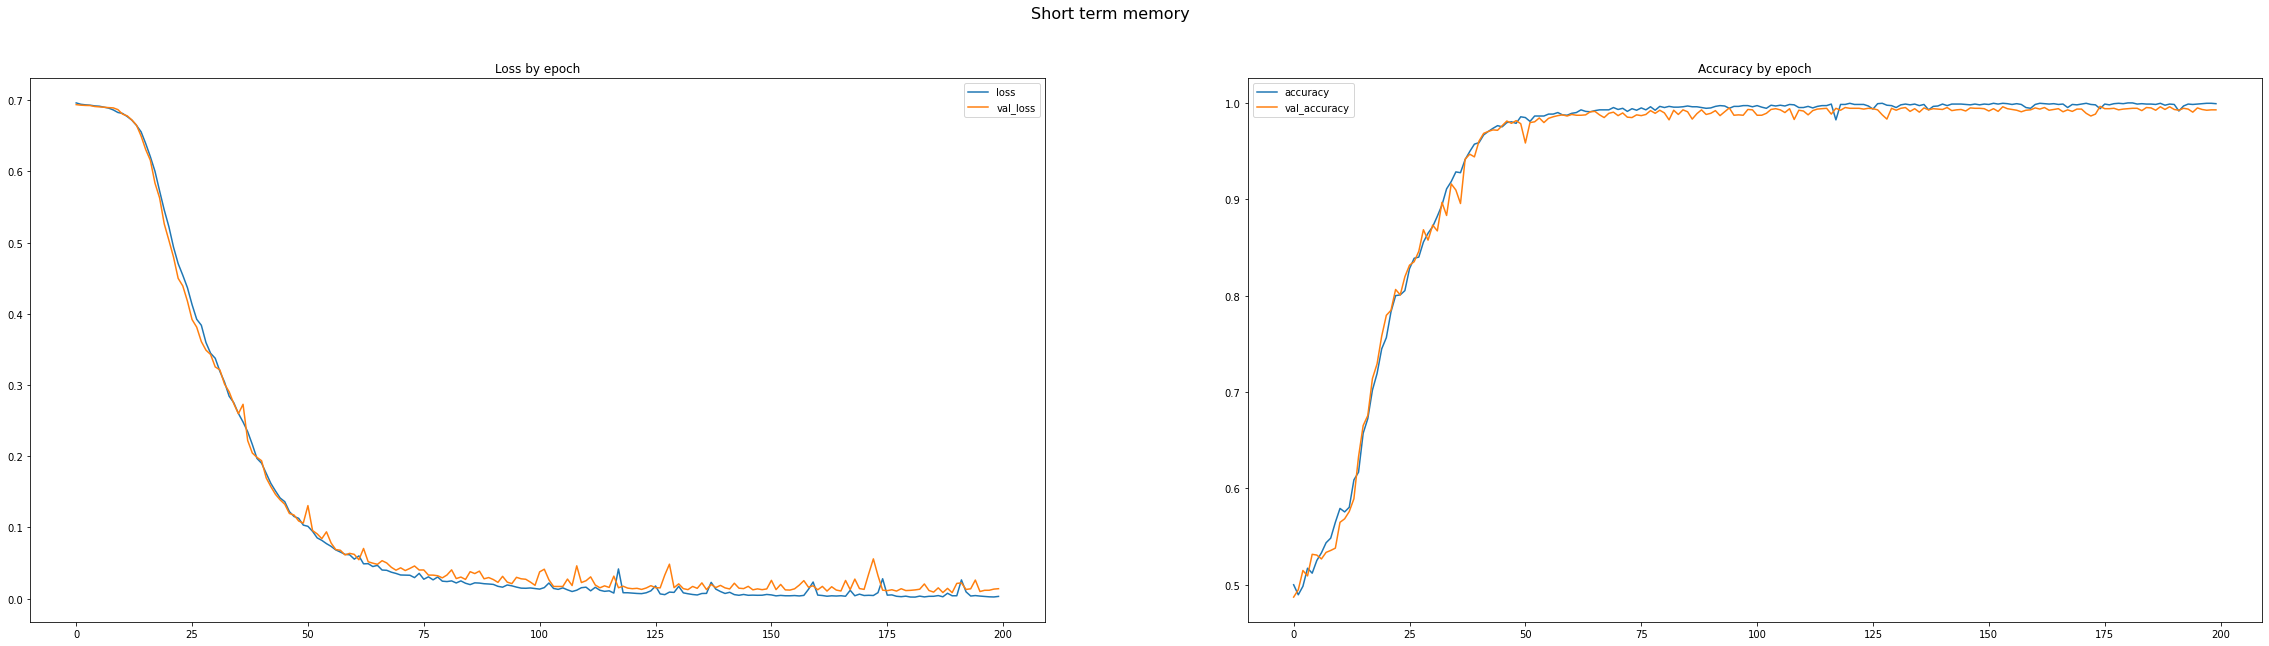

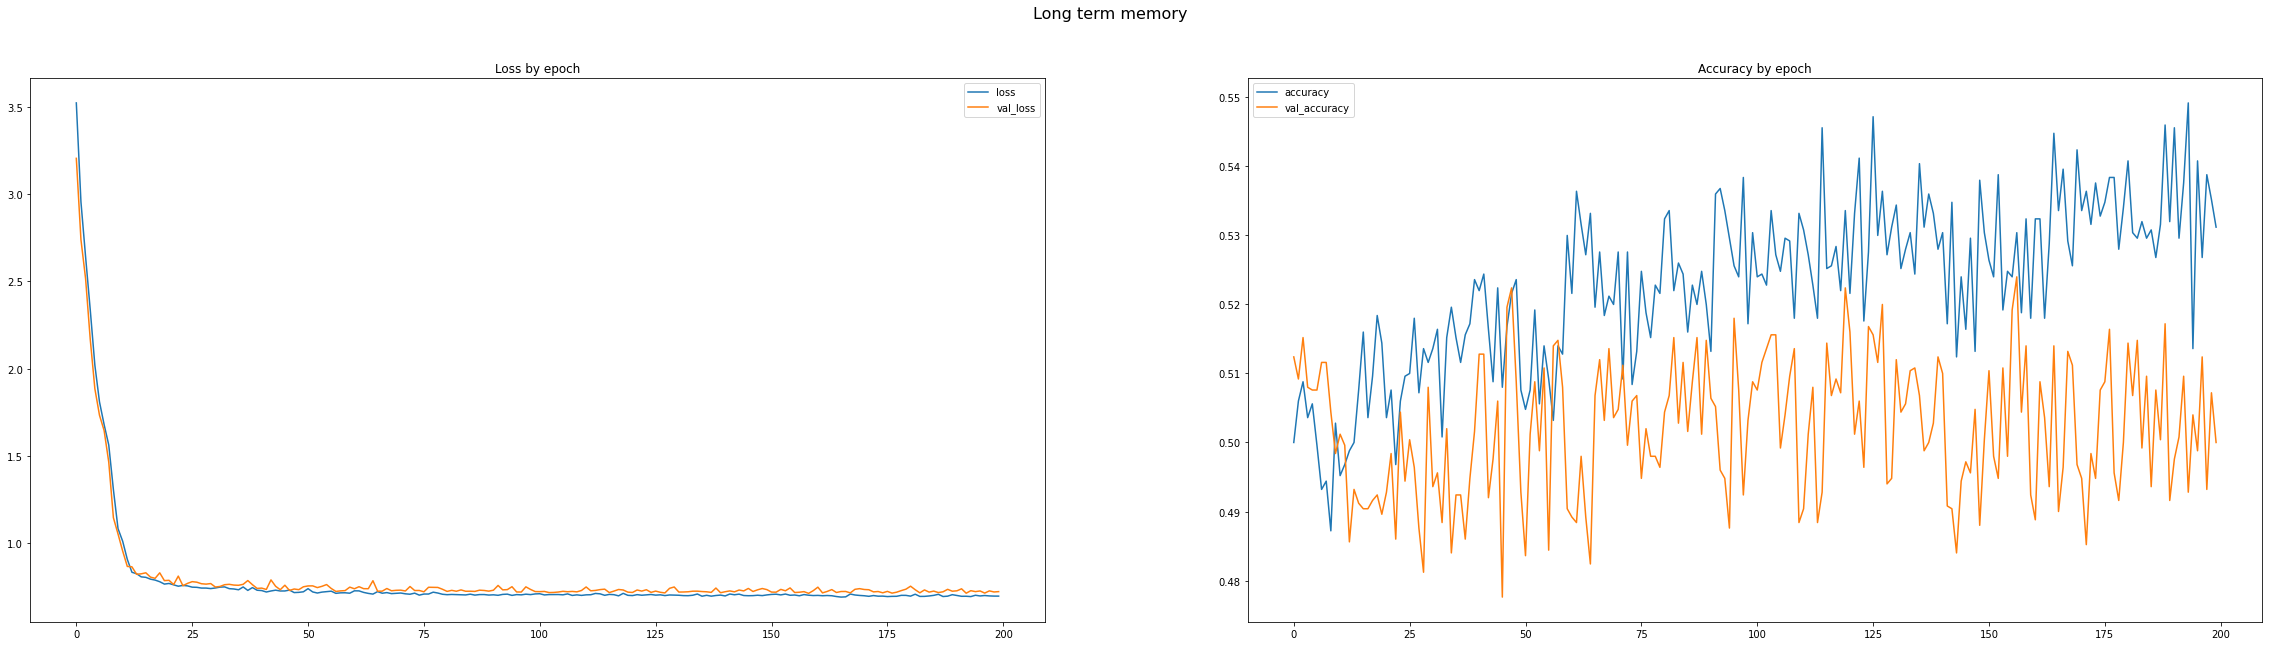

In [11]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

In [12]:
# longer time series
# Start with a small T and increase it later
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)

X = np.array(X)
N = len(X)

Y_short_memory = generate_label(X, -1, -2, -3)
Y_long_memory = generate_label(X, 0, 1, 2)

Short memory model
Epoch 1/200
79/79 [==============================] - 4s 24ms/step - loss: 0.6936 - accuracy: 0.5020 - val_loss: 0.6922 - val_accuracy: 0.5220
Epoch 2/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6918 - accuracy: 0.5272 - val_loss: 0.6899 - val_accuracy: 0.5416
Epoch 3/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6831 - accuracy: 0.5664 - val_loss: 0.6633 - val_accuracy: 0.6344
Epoch 4/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6110 - accuracy: 0.6840 - val_loss: 0.5207 - val_accuracy: 0.7892
Epoch 5/200
79/79 [==============================] - 1s 18ms/step - loss: 0.4144 - accuracy: 0.8596 - val_loss: 0.3178 - val_accuracy: 0.9076
Epoch 6/200
79/79 [==============================] - 1s 17ms/step - loss: 0.2613 - accuracy: 0.9244 - val_loss: 0.2167 - val_accuracy: 0.9468
Epoch 7/200
79/79 [==============================] - 1s 17ms/step - loss: 0.1831 - accuracy: 0.9528 - val_loss: 0.1570 - val_accu

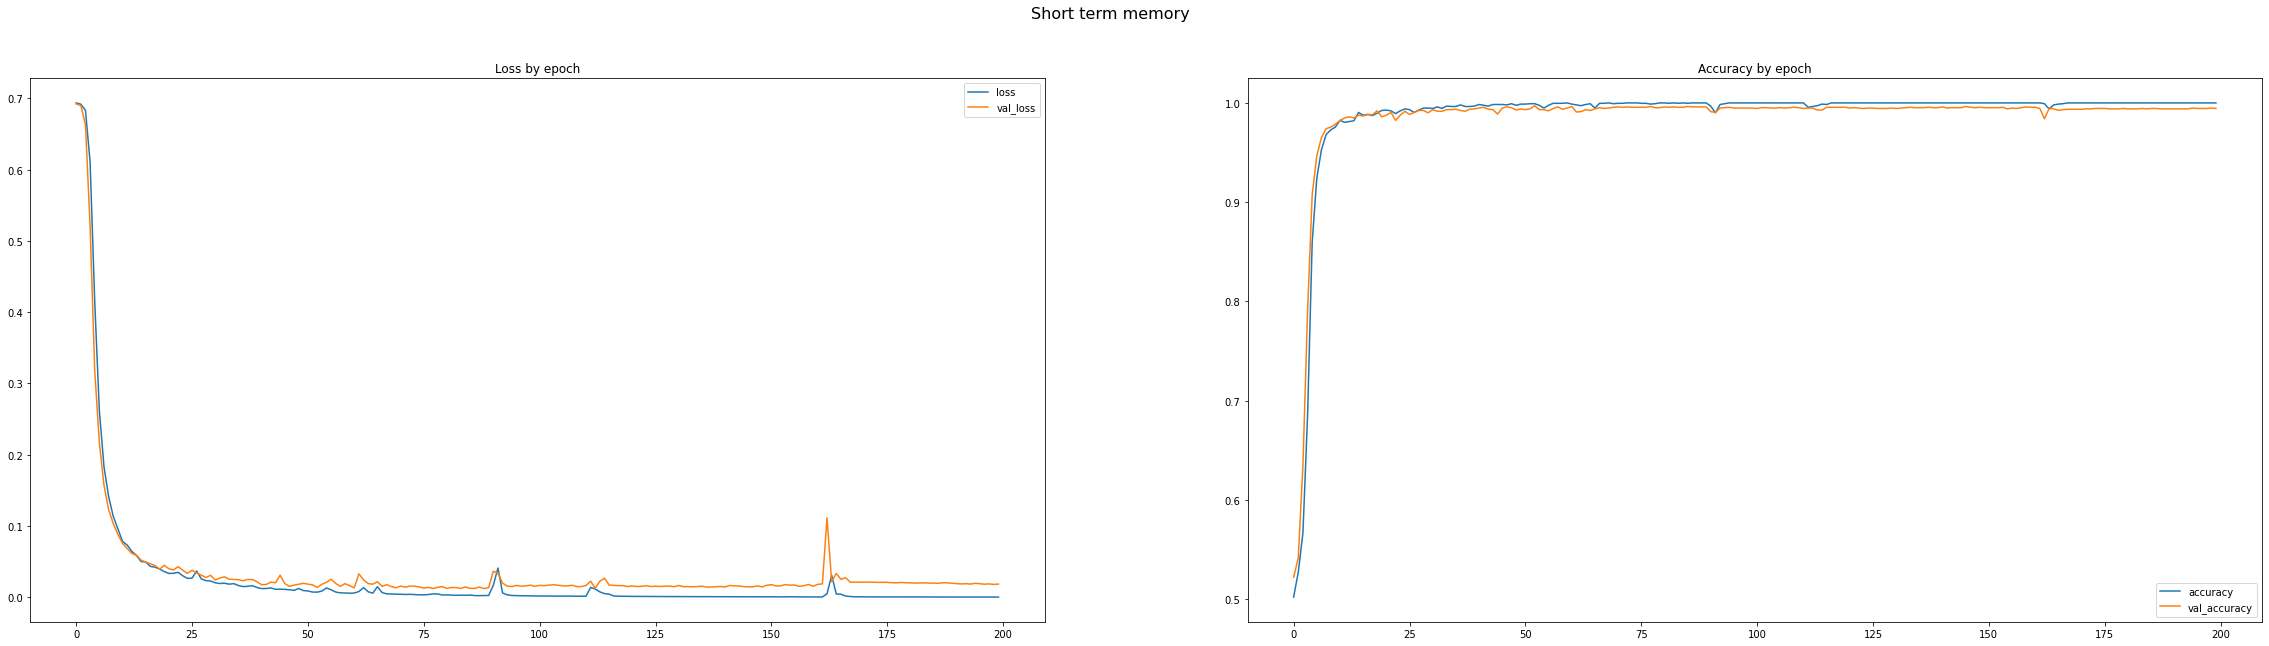

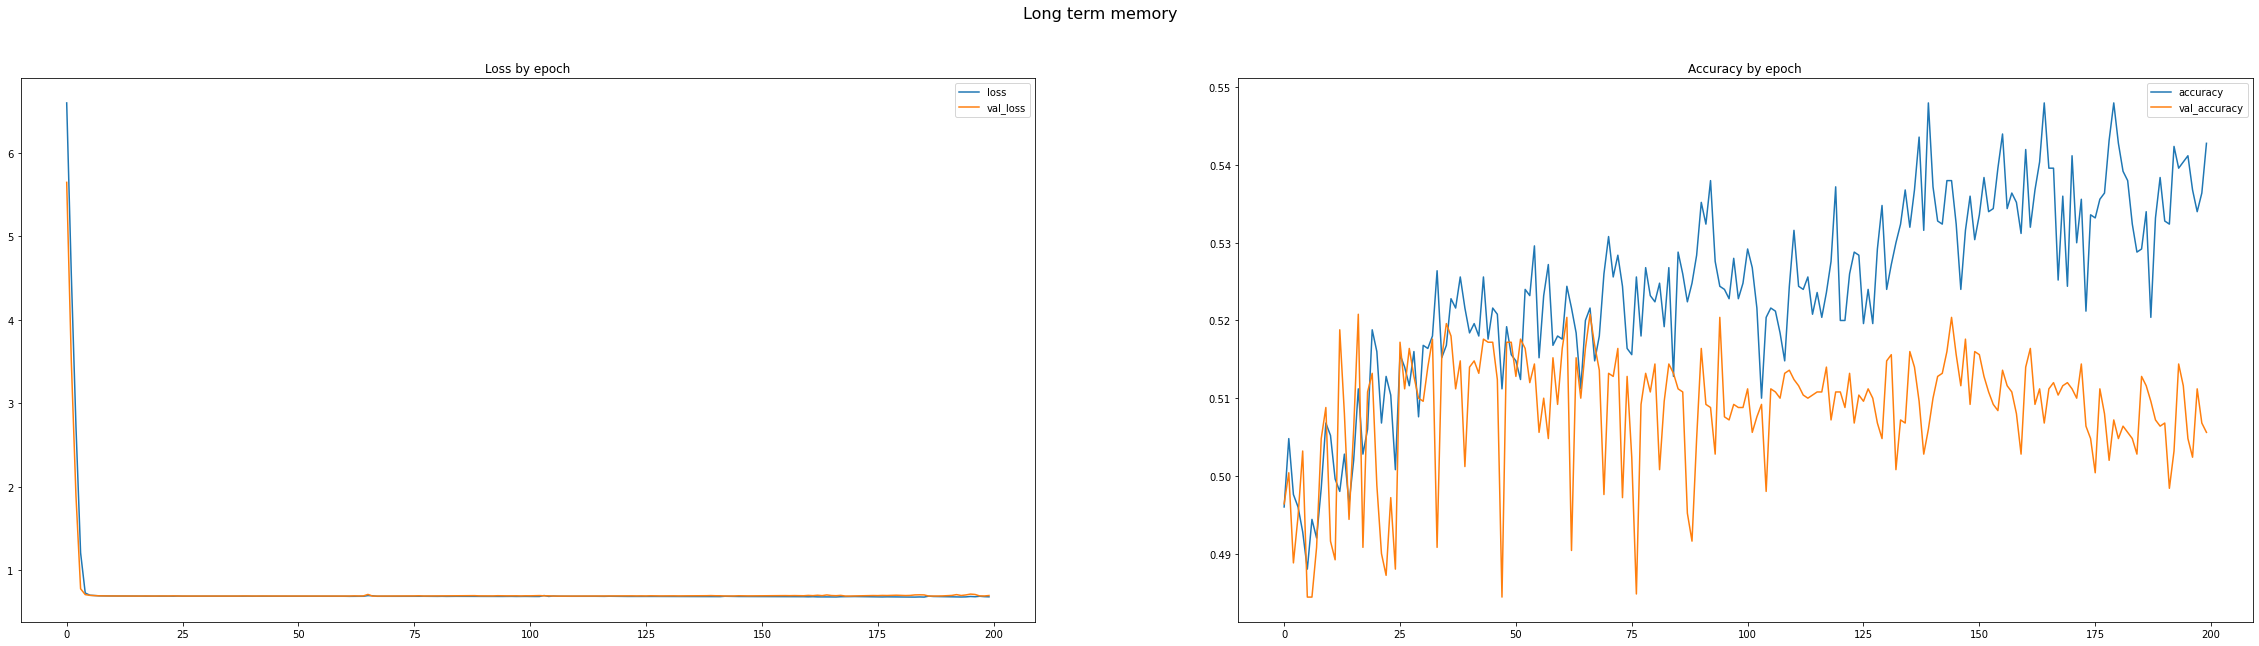

In [13]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

Short memory model
Epoch 1/400
79/79 [==============================] - 4s 23ms/step - loss: 0.6946 - accuracy: 0.4956 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 2/400
79/79 [==============================] - 1s 17ms/step - loss: 0.6946 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.5116
Epoch 3/400
79/79 [==============================] - 1s 18ms/step - loss: 0.6941 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5064
Epoch 4/400
79/79 [==============================] - 1s 18ms/step - loss: 0.6937 - accuracy: 0.4896 - val_loss: 0.6931 - val_accuracy: 0.5128
Epoch 5/400
79/79 [==============================] - 1s 17ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5016
Epoch 6/400
79/79 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5072
Epoch 7/400
79/79 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5092 - val_loss: 0.6944 - val_accu

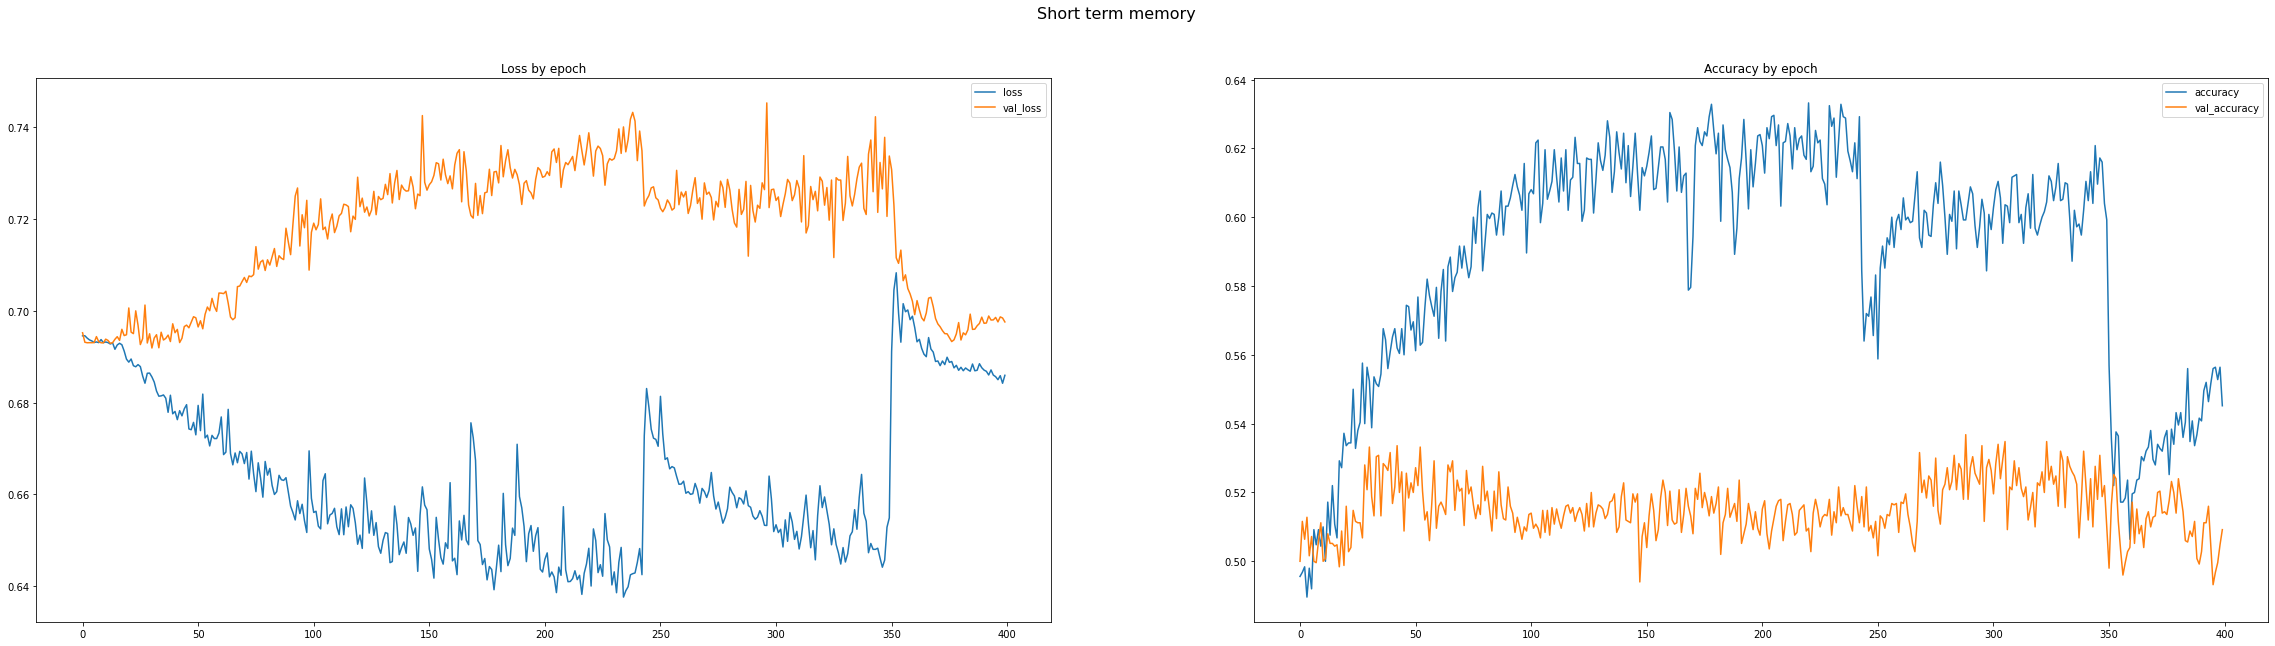

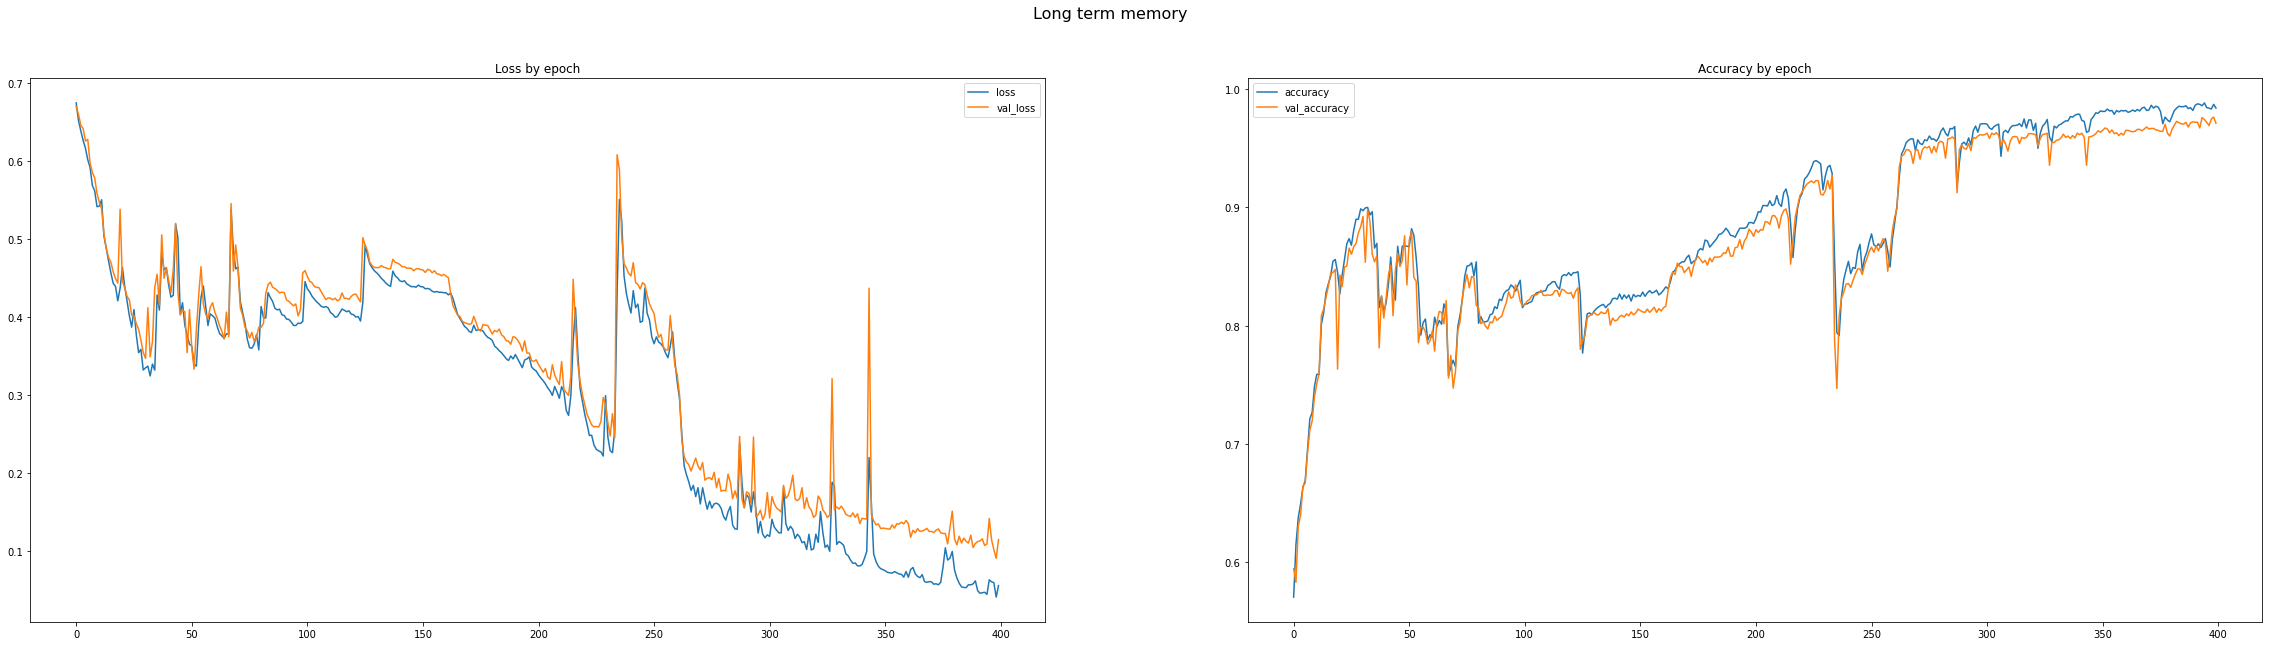

In [14]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 400, 0.01)